In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
import os

In [70]:
# data = pd.read_csv('../data/cells/test.csv')
# data.head()

In [71]:
controls = pd.concat([
    pd.read_csv('../data/cells/train_controls.csv'),
    pd.read_csv('../data/cells/test_controls.csv'),
])
controls.head()

,id_code,experiment,plate,well,sirna,well_type
0,HEPG2-01_1_B02,HEPG2-01,1,B02,1138,negative_control
1,HEPG2-01_1_C03,HEPG2-01,1,C03,1109,positive_control
2,HEPG2-01_1_C07,HEPG2-01,1,C07,1121,positive_control
3,HEPG2-01_1_C11,HEPG2-01,1,C11,1126,positive_control
4,HEPG2-01_1_C15,HEPG2-01,1,C15,1118,positive_control


In [72]:
len(controls.groupby(['experiment', 'plate']))

204

In [80]:
controls = controls.iloc[(controls['well_type'] == 'negative_control').values]
len(controls.groupby(['experiment', 'plate']))

204

In [81]:
controls['sirna'].unique()

array([1138])

In [83]:
controls.groupby(['experiment', 'plate'])

In [43]:
s = None
u = controls.groupby(['experiment', 'plate'])['sirna'].unique()
# print(len(u))

for row in u:
    if s is None:
        s = set(row)
        
    s = s.intersection(row)
    print(len(s))

# print(count == count_unique)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


# Plate Stats

In [306]:
data = pd.read_csv('../data/cells/train_controls.csv')
print(data.columns)
data = data[(data['sirna'] == 1138) & (data['well_type'] == 'negative_control')]
len(data)

Index(['id_code', 'experiment', 'plate', 'well', 'sirna', 'well_type'], dtype='object')


153

In [307]:
stats = pd.read_csv('../data/cells/pixel_stats.csv')
print(stats.columns)
len(stats)

Index(['id_code', 'experiment', 'plate', 'well', 'site', 'channel', 'mean',
       'std', 'median', 'min', 'max'],
      dtype='object')


753060

In [308]:
df = pd.merge(data, stats, on=['experiment', 'plate', 'well'], how='inner')
print(df.columns)
len(df)

Index(['id_code_x', 'experiment', 'plate', 'well', 'sirna', 'well_type',
       'id_code_y', 'site', 'channel', 'mean', 'std', 'median', 'min', 'max'],
      dtype='object')


1836

In [309]:
res = {}
for (exp, plate, well, site), group in df.groupby(['experiment', 'plate', 'well', 'site']):
    k = '{}_{}'.format(exp, plate)
    assert all(group['channel'] == range(1, 7))
    
    if k not in res:
        res[k] = []
    res[k].append(group[['mean', 'std']].values)
    
res = {k: torch.tensor(res[k]).float() / 255 for k in res}

torch.save(res, './plate_stats.pth')

In [318]:
import  torchvision.transforms as T

torchvision.transforms.transforms.RandomRotation

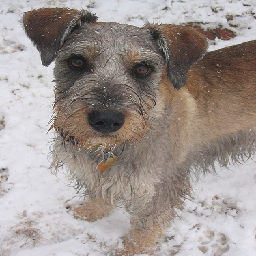

In [322]:
image = Image.open('../imet/sample.jpg')
image = image.resize((256, 256))
image

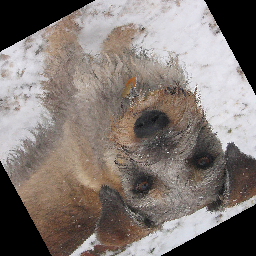

In [324]:
t = T.RandomRotation(360)
t(image)

In [104]:
tc = pd.read_csv('../data/cells/test_controls.csv')
tc['root'] = '../data/cells/test'
tc = tc[tc['sirna'] == 1138]
for (exp, plate), group in tc.groupby(['experiment', 'plate']):
    row = group.iloc[0]
    image = [
        Image.open(os.path.join(row['root'], exp, 'Plate{}'.format(plate), '{}_s1_w{}.png'.format(row['well'], c)))
        for c in range(1, 7)]
    image = np.array([np.array(c) for c in image])
    print(image.shape)
    
    plt.title('exp: {}, plate: {}'.format(exp, plate))
    plt.imshow(image)
    plt.plot()

FileNotFoundError: [Errno 2] No such file or directory: '../data/cells/test/HEPG2-08/Plate1/B02_s1_w1.png'